In [1]:
import vit

import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Settings
config = {
    "num_classes": 82, #REMEBER TO SET ACORDING TO THE MODEL YOU LOAD (Yoga82: 82, Yoga20: 20, Yoga6: 6)
    "img_size": 224,
    "img_channels": 3,
    "patch_size": 16,
    "hidden_size": 768,
    "hidden_dropout": 0.1,
    "attention_dropout": 0.1,
    "num_hidden_layers": 12,
    "num_attention_heads": 12,
    "mlp_hidden_size": 3072,
    "initializer_range": 0.02,
    "device": 'cuda',
    "transfer_learning": True,
}

In [3]:
# Load Model
model_path = 'ViT_B-16_Yoga82.pth' # SET HERE THE MODEL PATH

checkpoint = torch.load(model_path)
device = config['device']
model = vit.ViT(config).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Detected class: 10


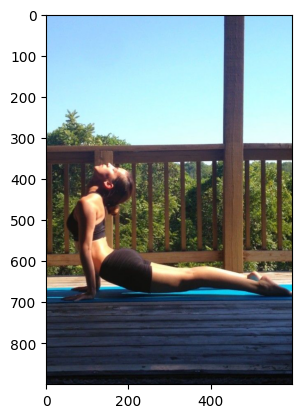

In [4]:
# Evaluate an Image
img_path = 'Images/Cobra_Pose_or_Bhujangasana_/3_167.jpg' # PATH TO THE INPUT IMAGE
#4,14,10
#img_path = 'Images/Standing_Split_pose_or_Urdhva_Prasarita_Eka_Padasana_/1_26.jpg' # PATH TO THE INPUT IMAGE
#0,3,61
img = Image.open(img_path).convert("RGB")
plt.imshow(img)

mean = [0.6732, 0.6525, 0.6263]
std = [0.2339, 0.2360, 0.2378]
tfs = transforms.Compose([
    transforms.Resize((config["img_size"],config["img_size"]),antialias=True),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

input = tfs(img).unsqueeze(0).to(device)
detection = np.argmax(model(input).cpu().detach()).item()
print(f'Detected class: {detection}')